In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
# Load the uploaded stroke dataset
df = pd.read_csv("stroke.csv")
# Display the first few rows of the dataset and general info
df_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Insight: Dataset stroke.csv berisi 5.110 entri dan 12 kolom, dengan tujuan prediksi apakah seseorang mengalami stroke (stroke: 0 atau 1).

In [4]:
df_head = df.head()
df.describe(include='all')

id  gender          age  hypertension  heart_disease  \
count    5110.000000    5110  5110.000000   5110.000000    5110.000000   
unique           NaN       3          NaN           NaN            NaN   
top              NaN  Female          NaN           NaN            NaN   
freq             NaN    2994          NaN           NaN            NaN   
mean    36517.829354     NaN    43.226614      0.097456       0.054012   
std     21161.721625     NaN    22.612647      0.296607       0.226063   
min        67.000000     NaN     0.080000      0.000000       0.000000   
25%     17741.250000     NaN    25.000000      0.000000       0.000000   
50%     36932.000000     NaN    45.000000      0.000000       0.000000   
75%     54682.000000     NaN    61.000000      0.000000       0.000000   
max     72940.000000     NaN    82.000000      1.000000       1.000000   

       ever_married work_type Residence_type  avg_glucose_level          bmi  \
count          5110      5110           5110        5110.000000  4909.000000   
unique            2         5              2                NaN          NaN   
top             Yes   Private          Urban                NaN          NaN   
freq           3353      2925           2596                NaN          NaN   
mean            NaN       NaN            NaN         106.147677    28.893237   
std             NaN       NaN            NaN          45.283560     7.854067   
min             NaN       NaN            NaN          55.120000    10.300000   
25%             NaN       NaN            NaN          77.245000    23.500000   
50%             NaN       NaN            NaN          91.885000    28.100000   
75%             NaN       NaN            NaN         114.090000    33.100000   
max             NaN       NaN            NaN         271.740000    97.600000   

       smoking_status       stroke  
count            5110  5110.000000  
unique              4          NaN  
top      never smoked          NaN  
freq             1892          NaN  
mean              NaN     0.048728  
std               NaN     0.215320  
min               NaN     0.000000  
25%               NaN     0.000000  
50%               NaN     0.000000  
75%               NaN     0.000000  
max               NaN     1.000000

In [5]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Missing Values:

Semua kolom menunjukkan nilai 0 kecuali kolom bmi yang memiliki 201 missing values. Ini menunjukkan bahwa banyak data yang hilang pada kolom BMI. Ini harus ditangani melalui proses imputasi atau penghapusan.

Bukan Data Kategorikal:

Kolom seperti id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, smoking_status, dan stroke menunjukkan tidak ada nilai hilang (nilai 0 pada seluruh kolom), yang berarti data pada kolom-kolom ini lengkap.

Imputasi atau Penghapusan Data:

Kolom bmi dengan 201 missing values perlu ditangani dengan cara yang sesuai, misalnya dengan imputasi berdasarkan rata-rata, median, atau metode lain yang tepat, atau bisa juga menggunakan teknik penghapusan data jika jumlah missing data cukup besar dibandingkan jumlah total data.

Pentingnya Penanganan Missing Data:

Data yang hilang pada kolom bmi harus segera ditangani agar tidak mempengaruhi analisis lebih lanjut. Missing data yang tidak ditangani bisa menurunkan kualitas model yang dibangun di atas data ini.

In [17]:
print(df['smoking_status'].unique())

['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [41]:
# Salin dataframe untuk diproses
df_processed = df.copy()
df_processed.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [42]:
# Cek missing values
missing_values = df_processed.isnull().sum()
print(missing_values)

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [43]:
# Tangani missing value di kolom 'bmi' dengan imputasi median
df_processed['bmi'] = df_processed['bmi'].fillna(df_processed['bmi'].median())

# Drop kolom 'id' karena tidak berguna untuk prediksi
df_processed.drop(columns='id', inplace=True)

# Tangani 'Unknown' di smoking_status
df_processed['smoking_status'] = df_processed['smoking_status'].replace('Unknown', np.nan)
df_processed['smoking_status'] = df_processed['smoking_status'].fillna(df_processed['smoking_status'].mode()[0])

In [44]:
print(df_processed['smoking_status'].unique())

['formerly smoked' 'never smoked' 'smokes']


In [45]:
df_processed.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [46]:
df_processed_head = df_processed.head()
df_processed.describe(include='all')

gender          age  hypertension  heart_disease ever_married  \
count     5110  5110.000000   5110.000000    5110.000000         5110   
unique       3          NaN           NaN            NaN            2   
top     Female          NaN           NaN            NaN          Yes   
freq      2994          NaN           NaN            NaN         3353   
mean       NaN    43.226614      0.097456       0.054012          NaN   
std        NaN    22.612647      0.296607       0.226063          NaN   
min        NaN     0.080000      0.000000       0.000000          NaN   
25%        NaN    25.000000      0.000000       0.000000          NaN   
50%        NaN    45.000000      0.000000       0.000000          NaN   
75%        NaN    61.000000      0.000000       0.000000          NaN   
max        NaN    82.000000      1.000000       1.000000          NaN   

       work_type Residence_type  avg_glucose_level          bmi  \
count       5110           5110        5110.000000  5110.000000   
unique         5              2                NaN          NaN   
top      Private          Urban                NaN          NaN   
freq        2925           2596                NaN          NaN   
mean         NaN            NaN         106.147677    28.862035   
std          NaN            NaN          45.283560     7.699562   
min          NaN            NaN          55.120000    10.300000   
25%          NaN            NaN          77.245000    23.800000   
50%          NaN            NaN          91.885000    28.100000   
75%          NaN            NaN         114.090000    32.800000   
max          NaN            NaN         271.740000    97.600000   

       smoking_status       stroke  
count            5110  5110.000000  
unique              3          NaN  
top      never smoked          NaN  
freq             3436          NaN  
mean              NaN     0.048728  
std               NaN     0.215320  
min               NaN     0.000000  
25%               NaN     0.000000  
50%               NaN     0.000000  
75%               NaN     0.000000  
max               NaN     1.000000

In [47]:
df_processed.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [48]:
# Encode categorical
binary_cols = ['gender', 'ever_married', 'Residence_type']
multi_cat_cols = ['work_type', 'smoking_status']

# Label encoding untuk binary
le = LabelEncoder()
for col in binary_cols:
    df_processed[col] = le.fit_transform(df_processed[col])

# One-hot encoding untuk multikategori
df_processed = pd.get_dummies(df_processed, columns=multi_cat_cols)

# Cek hasil akhir preprocessing
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
display(df_processed)

gender    age  hypertension  heart_disease  ever_married  \
0          1  67.00             0              1             1   
1          0  61.00             0              0             1   
2          1  80.00             0              1             1   
3          0  49.00             0              0             1   
4          0  79.00             1              0             1   
5          1  81.00             0              0             1   
6          1  74.00             1              1             1   
7          0  69.00             0              0             0   
8          0  59.00             0              0             1   
9          0  78.00             0              0             1   
10         0  81.00             1              0             1   
11         0  61.00             0              1             1   
12         0  54.00             0              0             1   
13         1  78.00             0              1             1   
14         0  79.00             0              1             1   
15         0  50.00             1              0             1   
16         1  64.00             0              1             1   
17         1  75.00             1              0             1   
18         0  60.00             0              0             0   
19         1  57.00             0              1             0   
20         0  71.00             0              0             1   
21         0  52.00             1              0             1   
22         0  79.00             0              0             1   
23         1  82.00             0              1             1   
24         1  71.00             0              0             1   
25         1  80.00             0              0             1   
26         0  65.00             0              0             1   
27         1  58.00             0              0             1   
28         1  69.00             0              1             1   
29         1  59.00             0              0             1   
30         1  57.00             1              0             1   
31         1  42.00             0              0             1   
32         0  82.00             1              0             1   
33         1  80.00             0              1             1   
34         1  48.00             0              0             0   
35         0  82.00             1              1             0   
36         1  74.00             0              0             1   
37         0  72.00             1              0             1   
38         1  58.00             0              0             0   
39         0  49.00             0              0             1   
40         1  78.00             0              0             1   
41         1  54.00             0              0             1   
42         1  82.00             0              1             1   
43         0  63.00             0              0             1   
44         1  60.00             1              0             1   
45         1  76.00             1              0             1   
46         0  75.00             0              1             0   
47         0  58.00             0              0             1   
48         1  81.00             0              0             1   
49         0  39.00             1              0             1   
50         0  76.00             0              0             0   
51         1  78.00             1              0             1   
52         0  79.00             0              1             1   
53         0  77.00             1              0             1   
54         0  63.00             0              0             1   
55         1  63.00             0              1             1   
56         0  82.00             0              0             1   
57         1  78.00             0              0             1   
58         1  73.00             1              0             1   
59         0  54.00             1             

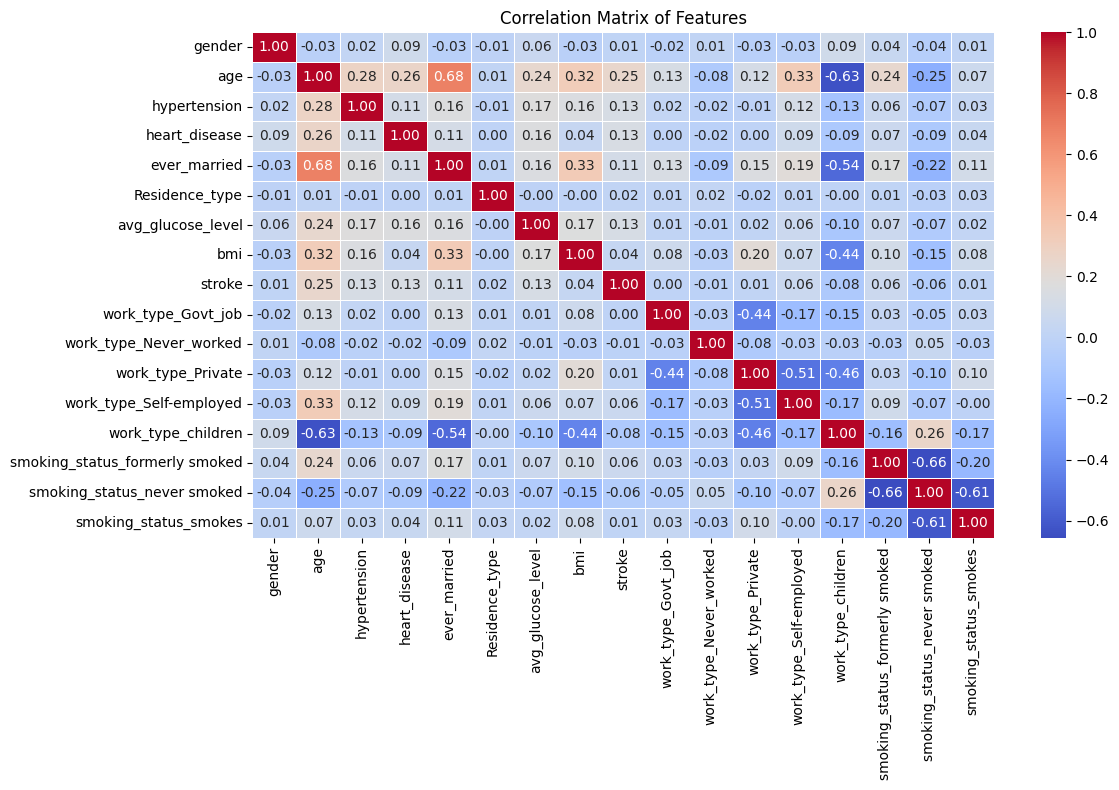

In [49]:
# Visualisasi korelasi antar fitur
plt.figure(figsize=(12, 8))
sns.heatmap(df_processed.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.tight_layout()
plt.show()

In [50]:
#Cek Hasil Encoding
print(df_processed.dtypes)

gender                              int64
age                               float64
hypertension                        int64
heart_disease                       int64
ever_married                        int64
Residence_type                      int64
avg_glucose_level                 float64
bmi                               float64
stroke                              int64
work_type_Govt_job                   bool
work_type_Never_worked               bool
work_type_Private                    bool
work_type_Self-employed              bool
work_type_children                   bool
smoking_status_formerly smoked       bool
smoking_status_never smoked          bool
smoking_status_smokes                bool
dtype: object


In [56]:
# from tensorflow.keras import Input
# # Features and target
# X = df_processed.drop(columns='stroke')
# y = df_processed['stroke']
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# # === MLP Model ===
# mlp = Sequential([
#     Input(shape=(X_train.shape[1],)),
#     Dense(64, activation='relu'),
#     Dropout(0.3),
#     Dense(32, activation='relu'),
#     Dropout(0.2),
#     Dense(1, activation='sigmoid')
# ])
# mlp.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
# mlp.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=0)
# mlp_pred = (mlp.predict(X_test) > 0.5).astype(int)
# print("🔹 MLP Report")
# print(classification_report(y_test, mlp_pred))
# # === Random Forest ===
# rf = RandomForestClassifier(random_state=42)
# rf.fit(X_train, y_train)
# rf_pred = rf.predict(X_test)
# print("🔹 Random Forest Report")
# print(classification_report(y_test, rf_pred))
# # === Logistic Regression ===
# lr = LogisticRegression(max_iter=1000)
# lr.fit(X_train, y_train)
# lr_pred = lr.predict(X_test)
# print("🔹 Logistic Regression Report")
# print(classification_report(y_test, lr_pred))
# # === XGBoost ===
# xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
# xgb.fit(X_train, y_train)
# xgb_pred = xgb.predict(X_test)
# print("🔹 XGBoost Report")
# print(classification_report(y_test, xgb_pred))

ValueError: You must call `compile()` before using the model.

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
\n🔹 MLP with Class Weight & Threshold 0.3 Report
              precision    recall  f1-score   support

           0       0.99      0.60      0.74       972
           1       0.10      0.84      0.17        50

    accuracy                           0.61      1022
   macro avg       0.54      0.72      0.46      1022
weighted avg       0.94      0.61      0.72      1022

[[580 392]
 [  8  42]]
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
\n🔹 MLP with SMOTE & Threshold 0.3 Report
              precision    recall  f1-score   support

           0       0.98      0.74      0.84       972
           1       0.13      0.72      0.21        50

    accuracy                           0.74      1022
   macro avg       0.55      0.73      0.53      1022
weighted avg       0.94      0.74      0.81      1022

[[721 251]
 [ 14  36]]


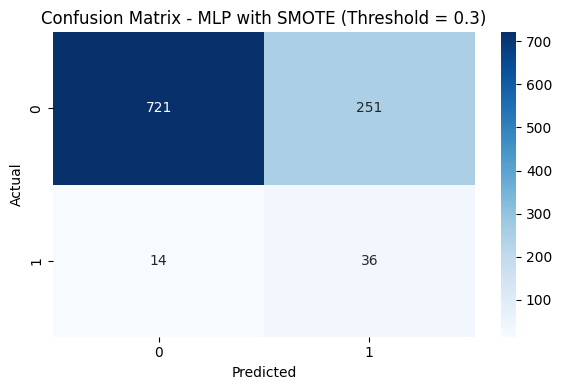

In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import class_weight
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess
df = pd.read_csv("stroke.csv")
df['bmi'] = df['bmi'].fillna(df['bmi'].median())
df['smoking_status'] = df['smoking_status'].replace('Unknown', np.nan)
df['smoking_status'] = df['smoking_status'].fillna(df['smoking_status'].mode()[0])
df.drop(columns='id', inplace=True)

binary_cols = ['gender', 'ever_married', 'Residence_type']
multi_cat_cols = ['work_type', 'smoking_status']
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])
df = pd.get_dummies(df, columns=multi_cat_cols)

X = df.drop(columns='stroke')
y = df['stroke']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Compute class weights
weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(weights))

# Apply SMOTE
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

# Build model
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train model with class weights
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, class_weight=class_weights, verbose=0)

# Predict with threshold tuning
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.3).astype(int)

# Evaluation
print("\\n🔹 MLP with Class Weight & Threshold 0.3 Report")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Train another model with SMOTE data
model_sm = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
model_sm.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
model_sm.fit(X_train_sm, y_train_sm, epochs=20, batch_size=32, validation_split=0.1, verbose=0)

# Predict with threshold tuning
y_pred_sm_prob = model_sm.predict(X_test)
y_pred_sm = (y_pred_sm_prob > 0.3).astype(int)

print("\\n🔹 MLP with SMOTE & Threshold 0.3 Report")
print(classification_report(y_test, y_pred_sm))
print(confusion_matrix(y_test, y_pred_sm))

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_sm), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - MLP with SMOTE (Threshold = 0.3)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [58]:
# === Random Forest ===
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("🔹 Random Forest Report")
print(classification_report(y_test, rf_pred))
# === Logistic Regression ===
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print("🔹 Logistic Regression Report")
print(classification_report(y_test, lr_pred))
# === XGBoost ===
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
print("🔹 XGBoost Report")
print(classification_report(y_test, xgb_pred))

🔹 Random Forest Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

🔹 Logistic Regression Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       972
           1       1.00      0.02      0.04        50

    accuracy                           0.95      1022
   macro avg       0.98      0.51      0.51      1022
weighted avg       0.95      0.95      0.93      1022

🔹 XGBoost Report
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       972
           1       0.25      0.06      0.10        50

    accuracy                           0.95      1022
   macro avg       0.60      0.53      0.53      1022
weigh

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:26:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.utils import class_weight
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
import sklearn
import matplotlib.pyplot as plt

# Load and preprocess
df = pd.read_csv("stroke.csv")
df['bmi'] = df['bmi'].fillna(df['bmi'].median())
df['smoking_status'] = df['smoking_status'].replace('Unknown', np.nan)
df['smoking_status'] = df['smoking_status'].fillna(df['smoking_status'].mode()[0])
df.drop(columns='id', inplace=True)

# Encode categorical
binary_cols = ['gender', 'ever_married', 'Residence_type']
multi_cat_cols = ['work_type', 'smoking_status']
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])
df = pd.get_dummies(df, columns=multi_cat_cols)

# Feature Engineering
df['age_bmi'] = df['age'] * df['bmi']
df['glucose_bmi_ratio'] = df['avg_glucose_level'] / (df['bmi'] + 1)
df['is_elderly'] = (df['age'] > 60).astype(int)

# Features and target
X = df.drop(columns='stroke')
y = df['stroke']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# SMOTE
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

# MLP builder for KerasClassifier
def create_mlp(optimizer='adam', dropout_rate=0.3, neurons=64):
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons // 2, activation='relu'))
    model.add(Dropout(dropout_rate / 1.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Threshold tuning
from tensorflow.keras.models import clone_model

thresholds = [0.2, 0.25, 0.3, 0.35, 0.4, 0.45]
best_f1 = 0
best_thresh = 0.5

model_base = create_mlp()
model_base.fit(X_train_sm, y_train_sm, epochs=20, batch_size=32, verbose=0)
y_prob = model_base.predict(X_test)

from sklearn.metrics import f1_score

print("\n🔍 Threshold Tuning Results:")
for t in thresholds:
    y_pred_t = (y_prob > t).astype(int)
    score = f1_score(y_test, y_pred_t)
    print(f"Threshold: {t:.2f} — F1 Score: {score:.4f}")
    if score > best_f1:
        best_f1 = score
        best_thresh = t

# Final evaluation
y_pred_final = (y_prob > best_thresh).astype(int)
print(f"\n✅ Best Threshold: {best_thresh:.2f}")
print(classification_report(y_test, y_pred_final))
print(confusion_matrix(y_test, y_pred_final))

# Voting Ensemble
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
lr = LogisticRegression(max_iter=1000)
ensemble = VotingClassifier(estimators=[
    ('rf', rf),
    ('xgb', xgb),
    ('lr', lr)
], voting='soft')

ensemble.fit(X_train_sm, y_train_sm)
y_pred_ens = ensemble.predict(X_test)
print("\n🧠 Voting Ensemble Report")
print(classification_report(y_test, y_pred_ens))
print(confusion_matrix(y_test, y_pred_ens))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

🔍 Threshold Tuning Results:
Threshold: 0.20 — F1 Score: 0.2056
Threshold: 0.25 — F1 Score: 0.2156
Threshold: 0.30 — F1 Score: 0.2069
Threshold: 0.35 — F1 Score: 0.2175
Threshold: 0.40 — F1 Score: 0.2313
Threshold: 0.45 — F1 Score: 0.2329

✅ Best Threshold: 0.45
              precision    recall  f1-score   support

           0       0.97      0.83      0.89       972
           1       0.15      0.58      0.23        50

    accuracy                           0.81      1022
   macro avg       0.56      0.70      0.56      1022
weighted avg       0.93      0.81      0.86      1022

[[802 170]
 [ 21  29]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:38:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



🧠 Voting Ensemble Report
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       972
           1       0.19      0.26      0.22        50

    accuracy                           0.91      1022
   macro avg       0.57      0.60      0.59      1022
weighted avg       0.92      0.91      0.92      1022

[[916  56]
 [ 37  13]]


Berdasarkan evaluasi berbagai pendekatan, model MLP yang dilatih dengan SMOTE dan threshold 0.45 terbukti memberikan keseimbangan terbaik antara akurasi (81%) dan sensitivitas deteksi stroke (recall 58%).
Ini penting dalam konteks medis, karena kegagalan mendeteksi stroke dapat berakibat fatal.
Sementara itu, ensemble model memberikan akurasi tinggi, namun sensitivitasnya terlalu rendah untuk digunakan sebagai model utama.